### Project description:
+ Finding SMA Crossover Strategy

In [3]:
# project dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
from collections import Counter
plt.style.use('fivethirtyeight')

In [2]:
# Creating first test case by initiating the first dataframe for UCO

# URL >> https://query1.finance.yahoo.com/v8/finance/chart/{$symbol}?range={$range}&interval={$interval}
# symbol >> the stock ticker symbol, e.g. AAPL for Apple
# range >> the desired range of the query, allowed parameters are [1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max]
# interval >> the desired interval of the quote, e.g. every 5 minutes, allowed parameters are [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

ENDPOINT = "https://query1.finance.yahoo.com/v8/finance/chart/"

# Stock symbol
symbol = ["AAPL","TSLA"]
def createURL(sym, ran, inter):
    return ENDPOINT+sym+"?"+"range="+ran+"&interval="+inter


# APPLE

In [3]:
# Fetching data
url = createURL(symbol[0], "6mo", "1h")
print(url)
req = requests.get(url).json()
_rawcolumn_names = list(req['chart']['result'][0])
values = req['chart']['result'][0][_rawcolumn_names[2]]['quote'][0]
cols = list(values.keys())



https://query1.finance.yahoo.com/v8/finance/chart/AAPL?range=6mo&interval=1h


NameError: name 'requests' is not defined

In [6]:
# Create Dataframe 
df = pd.DataFrame(columns=cols)
df[cols[0]] = values['close']
df[cols[1]] = values['high']
df[cols[2]] = values['open']
df[cols[3]] = values['volume']
df[cols[4]] = values['low']


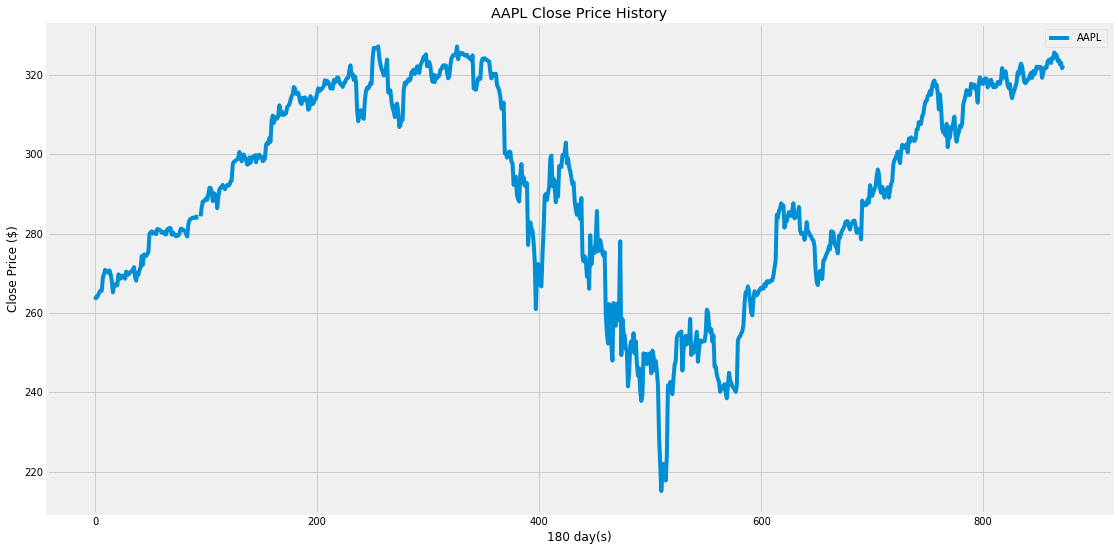

In [7]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(df['close'], label="AAPL")
plt.title("AAPL Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc="upper right")
plt.show()

In [8]:
# Create the SMA for 9 days

sma_9 = pd.DataFrame()
sma_9['Close Price'] = df['close'].rolling(window= 9).mean().dropna()

sma_9

,Close Price
8,265.705933
9,266.544088
10,267.261868
11,267.965224
12,268.576335
...,...
868,324.302507
869,324.170285
870,324.184441
871,323.893375


In [9]:
# Create the SMA for 14 days

sma_14 = pd.DataFrame()
sma_14['Close Price'] = df['close'].rolling(window= 14).mean().dropna()
sma_14

,Close Price
13,267.425971
14,267.883371
15,268.174085
16,268.255515
17,268.404809
...,...
868,323.669468
869,323.747325
870,323.831074
871,323.822532


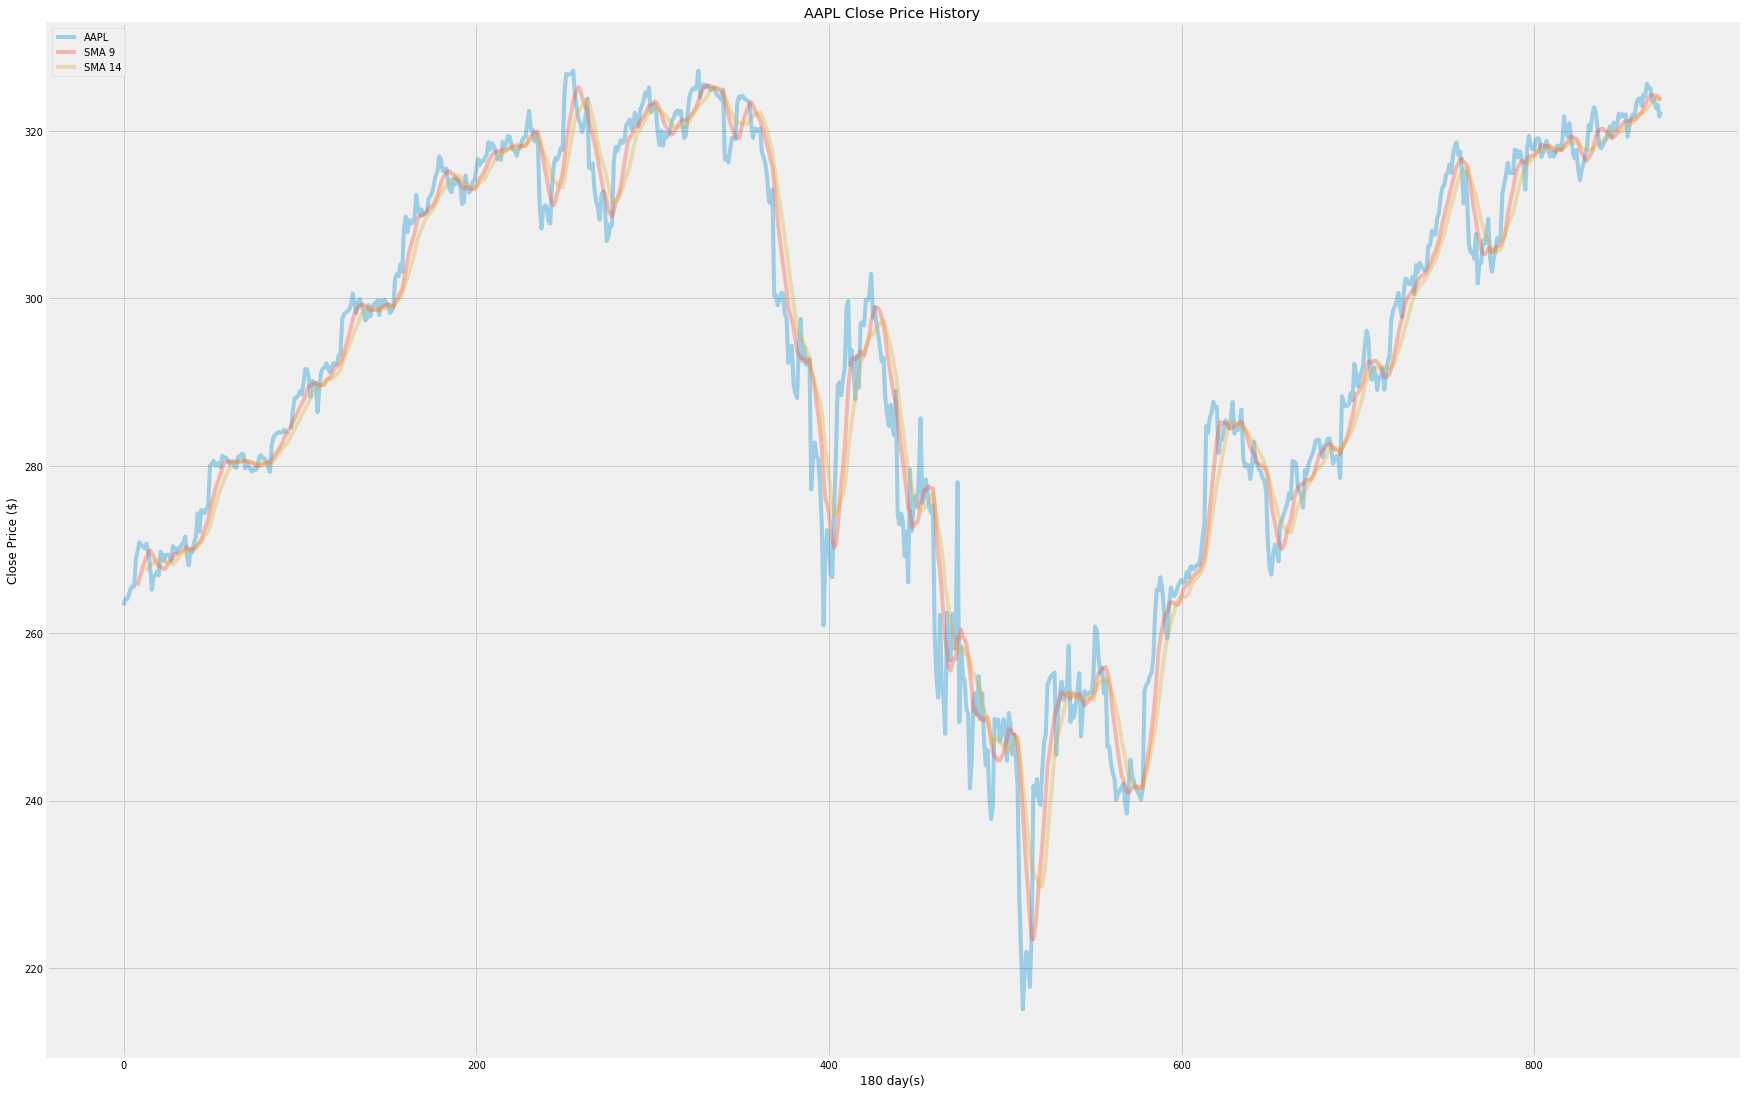

In [10]:
# Plotting the data
plt.figure(figsize=(27, 19))
plt.plot(df['close'], label="AAPL", alpha=.35)
plt.plot(sma_9['Close Price'], label="SMA 9", alpha=.35)
plt.plot(sma_14['Close Price'], label="SMA 14", alpha=.35)
plt.title("AAPL Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [11]:
# Merging all the columns into one table
data = pd.DataFrame()
data['AAPL'] = df['close']
data['SMA 9'] = sma_9['Close Price']
data['SMA 14'] = sma_14['Close Price']
data

,AAPL,SMA 9,SMA 14
0,263.326599,NaN,NaN
1,264.079987,NaN,NaN
2,264.049988,NaN,NaN
3,264.619995,NaN,NaN
4,265.299713,NaN,NaN
...,...,...,...
868,323.859985,324.302507,323.669468
869,322.739990,324.170285,323.747325
870,323.152496,324.184441,323.831074
871,321.720398,323.893375,323.822532


In [12]:
# Creating the signal when to buy and sell the stock

def create_signal(data):
    buy_sig_price = []
    sell_sig_price = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA 9'][i] > data['SMA 14'][i]:
            
            if flag != 1:
                
                buy_sig_price.append(data["AAPL"][i])
                sell_sig_price.append(np.nan)
                flag = 1
                
            else:
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        elif data['SMA 9'][i] < data['SMA 14'][i]:
            
            if flag != 0:
                    
                buy_sig_price.append(np.nan)
                sell_sig_price.append(data["AAPL"][i])
                flag = 0
                
            else:
                
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        else:
            
            buy_sig_price.append(np.nan)
            sell_sig_price.append(np.nan)
                
    return (buy_sig_price, sell_sig_price)

In [13]:
# Storing values into a variable

buy_sell = create_signal(data)
data["Buy Signal Price"] = buy_sell[0]
data["Sell Signal Price"] = buy_sell[1]

#show data
data.fillna(0)

,AAPL,SMA 9,SMA 14,Buy Signal Price,Sell Signal Price
0,263.326599,0.000000,0.000000,0.0,0.000000
1,264.079987,0.000000,0.000000,0.0,0.000000
2,264.049988,0.000000,0.000000,0.0,0.000000
3,264.619995,0.000000,0.000000,0.0,0.000000
4,265.299713,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...
868,323.859985,324.302507,323.669468,0.0,0.000000
869,322.739990,324.170285,323.747325,0.0,0.000000
870,323.152496,324.184441,323.831074,0.0,0.000000
871,321.720398,323.893375,323.822532,0.0,0.000000


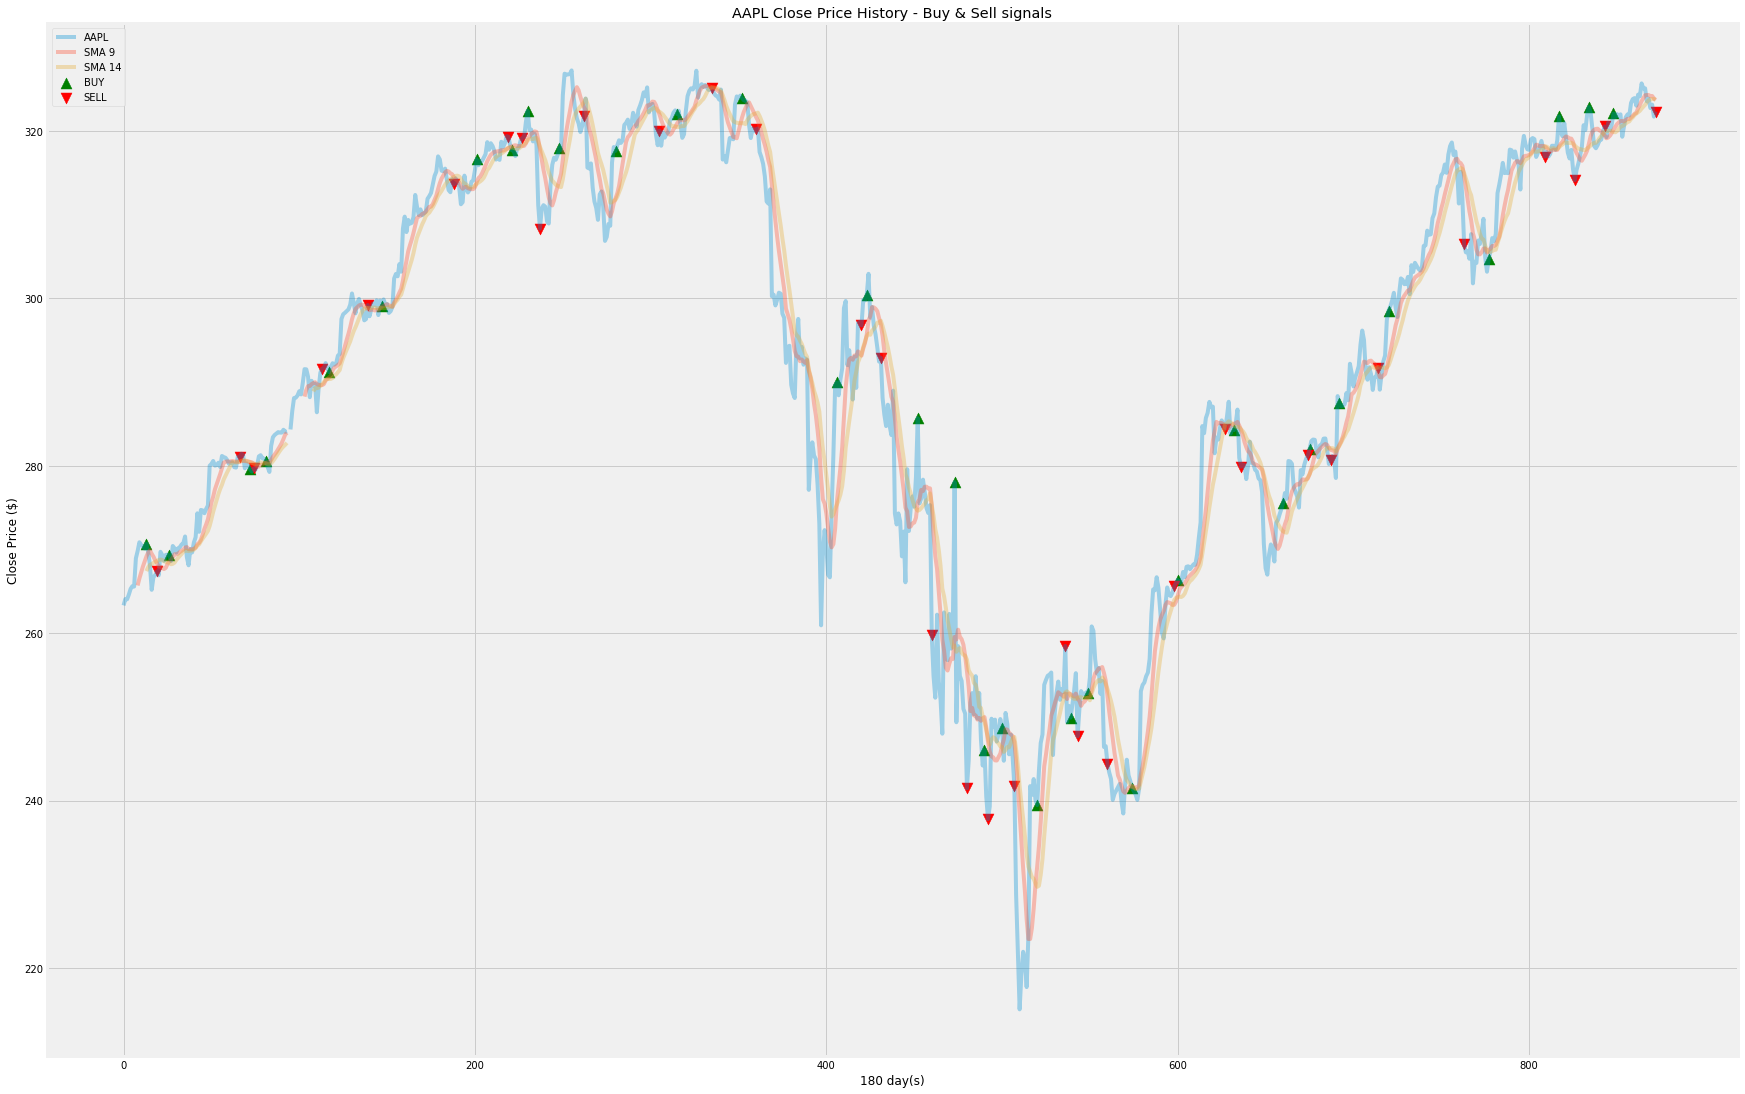

In [14]:
# Plotting the data
plt.figure(figsize=(27, 19))
plt.plot(data['AAPL'], label="AAPL", alpha=.35)
plt.plot(data['SMA 9'], label="SMA 9", alpha=.35)
plt.plot(data['SMA 14'], label="SMA 14", alpha=.35)
plt.scatter(data.index, data['Buy Signal Price'], label="BUY", marker="^", color='green',s=120)
plt.scatter(data.index, data['Sell Signal Price'], label="SELL", marker="v", color='red',s=120)
plt.title("AAPL Close Price History - Buy & Sell signals")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

# TESLA

In [15]:
url = createURL(symbol[1], "6mo", "1h")
req = requests.get(url).json()
_rawcolumn_names = list(req['chart']['result'][0])
values = req['chart']['result'][0][_rawcolumn_names[2]]['quote'][0]
cols = list(values.keys())

In [16]:
# Create Dataframe 
df = pd.DataFrame(columns=cols)
df[cols[0]] = values['close']
df[cols[1]] = values['high']
df[cols[2]] = values['open']
df[cols[3]] = values['volume']
df[cols[4]] = values['low']


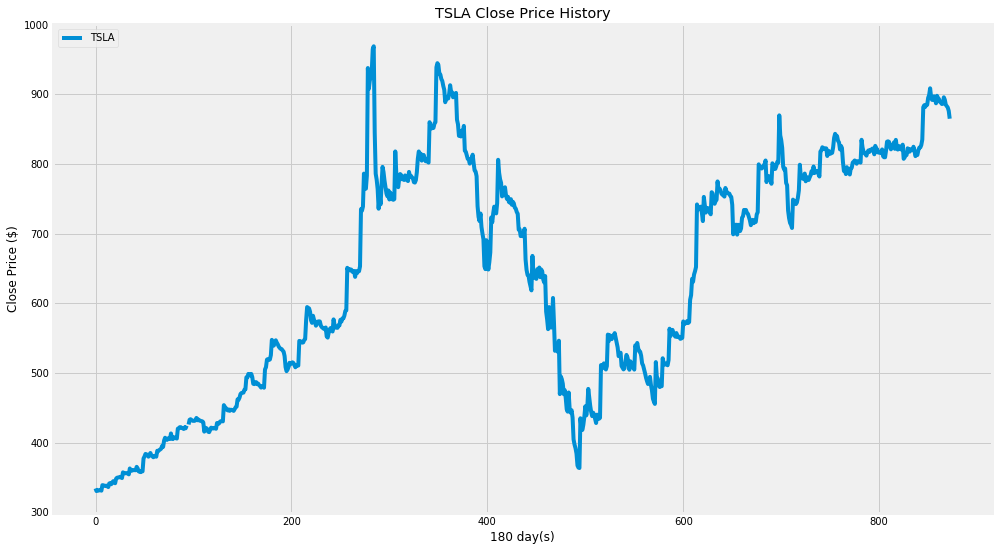

In [17]:
# Plotting the data
plt.figure(figsize=(15, 9))
plt.plot(df['close'], label="TSLA")
plt.title("TSLA Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc="upper left")
plt.show()

In [18]:
# Create the SMA for 9 days

sma_9 = pd.DataFrame()
sma_9['Close Price'] = df['close'].rolling(window= 9).mean().dropna()

sma_9

,Close Price
8,333.085161
9,333.531016
10,334.331560
11,335.122670
12,335.819339
...,...
868,890.109999
869,888.765944
870,887.409939
871,885.970005


In [19]:
# Create the SMA for 14 days

sma_14 = pd.DataFrame()
sma_14['Close Price'] = df['close'].rolling(window= 14).mean()
sma_14.dropna()

,Close Price
13,334.614033
14,335.119941
15,335.941005
16,336.592433
17,337.397435
...,...
868,891.409698
869,890.759949
870,889.611093
871,888.307151


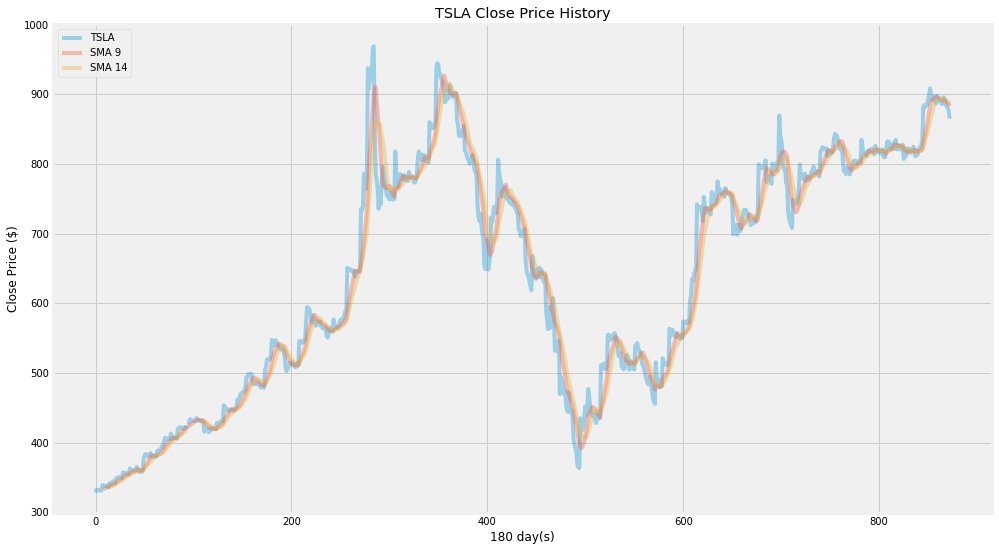

In [20]:
# Plotting the data
plt.figure(figsize=(15, 9))
plt.plot(df['close'], label="TSLA", alpha=.35)
plt.plot(sma_9['Close Price'], label="SMA 9", alpha=.35)
plt.plot(sma_14['Close Price'], label="SMA 14",  alpha=.35)
plt.title("TSLA Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [21]:
# Merging all the columns into one table
data = pd.DataFrame()
data['TSLA'] = df['close']
data['SMA 9'] = sma_9['Close Price']
data['SMA 14'] = sma_14['Close Price']
data.dropna()

,TSLA,SMA 9,SMA 14
13,336.000000,336.280450,334.614033
14,341.160004,337.353227,335.119941
15,341.790009,338.568783,335.941005
16,340.070007,338.714339,336.592433
17,342.170013,339.113339,337.397435
...,...,...,...
868,885.000000,890.109999,891.409698
869,882.903503,888.765944,890.759949
870,881.075989,887.409939,889.611093
871,876.240601,885.970005,888.307151


In [22]:
# Creating the signal when to buy and sell the stock

def create_signal(data):
    buy_sig_price = []
    sell_sig_price = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA 9'][i] > data['SMA 14'][i]:
            
            if flag != 1:
                
                buy_sig_price.append(data["TSLA"][i])
                sell_sig_price.append(np.nan)
                flag = 1
                
            else:
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        elif data['SMA 9'][i] < data['SMA 14'][i]:
            
            if flag != 0:
                    
                buy_sig_price.append(np.nan)
                sell_sig_price.append(data["TSLA"][i])
                flag = 0
                
            else:
                
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        else:
            
            buy_sig_price.append(np.nan)
            sell_sig_price.append(np.nan)
                
    return (buy_sig_price, sell_sig_price)

In [23]:
# Storing values into a variable

buy_sell = create_signal(data)
data["Buy Signal Price"] = buy_sell[0]
data["Sell Signal Price"] = buy_sell[1]

#show data
data.fillna(0)

,TSLA,SMA 9,SMA 14,Buy Signal Price,Sell Signal Price
0,334.077301,0.000000,0.000000,0.0,0.0
1,330.295105,0.000000,0.000000,0.0,0.0
2,330.950012,0.000000,0.000000,0.0,0.0
3,330.899994,0.000000,0.000000,0.0,0.0
4,331.850006,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...
868,885.000000,890.109999,891.409698,0.0,0.0
869,882.903503,888.765944,890.759949,0.0,0.0
870,881.075989,887.409939,889.611093,0.0,0.0
871,876.240601,885.970005,888.307151,0.0,0.0


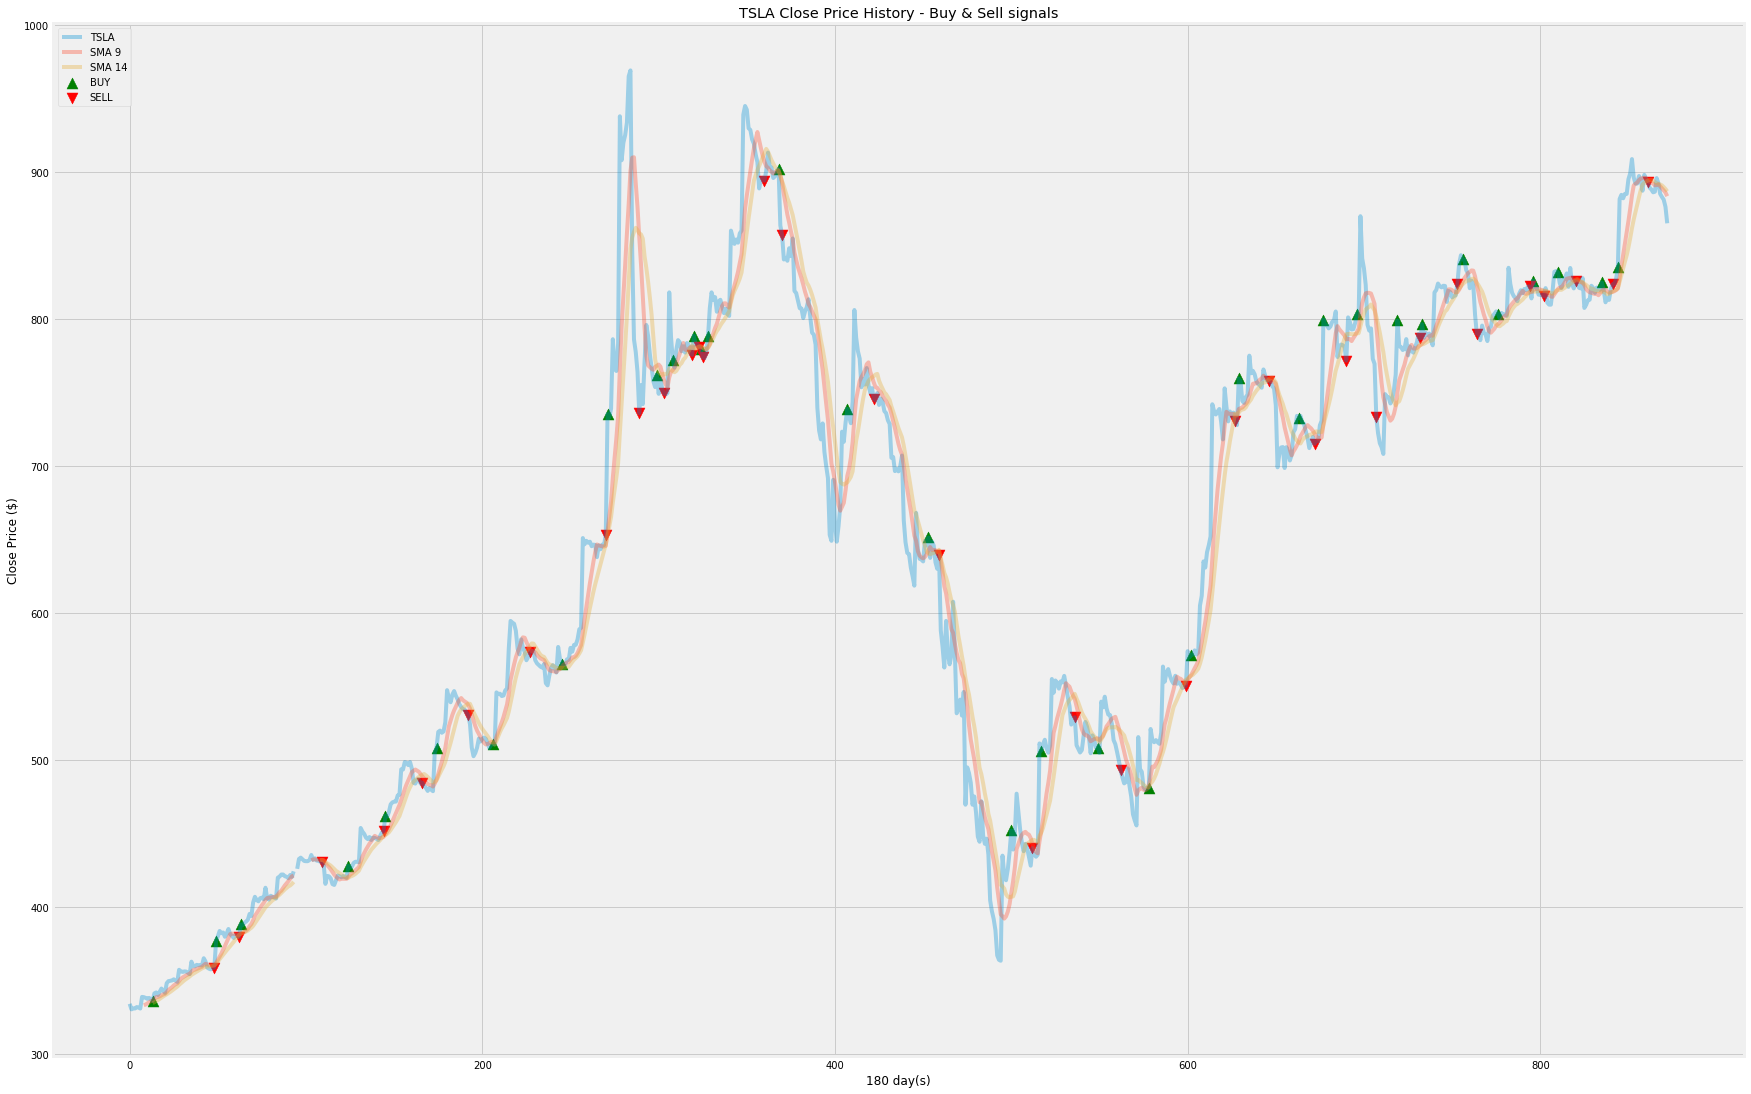

In [24]:
# Plotting the data
plt.figure(figsize=(27, 19))
plt.plot(data['TSLA'], label="TSLA", alpha=.35)
plt.plot(data['SMA 9'], label="SMA 9", alpha=.35)
plt.plot(data['SMA 14'], label="SMA 14", alpha=.35)
plt.scatter(data.index, data['Buy Signal Price'], label="BUY", marker="^", color='green', s=120)
plt.scatter(data.index, data['Sell Signal Price'], label="SELL", marker="v", color='red', s=120)
plt.title("TSLA Close Price History - Buy & Sell signals")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

# BTC-USD

In [25]:
url = createURL("BTC-USD", "1mo", "1h")
req = requests.get(url).json()
_rawcolumn_names = list(req['chart']['result'][0])
values = req['chart']['result'][0][_rawcolumn_names[2]]['quote'][0]
cols = list(values.keys())

# Create Dataframe 
df = pd.DataFrame(columns=cols)
df[cols[0]] = values['close']
df[cols[1]] = values['high']
df[cols[2]] = values['open']
df[cols[3]] = values['volume']
df[cols[4]] = values['low']


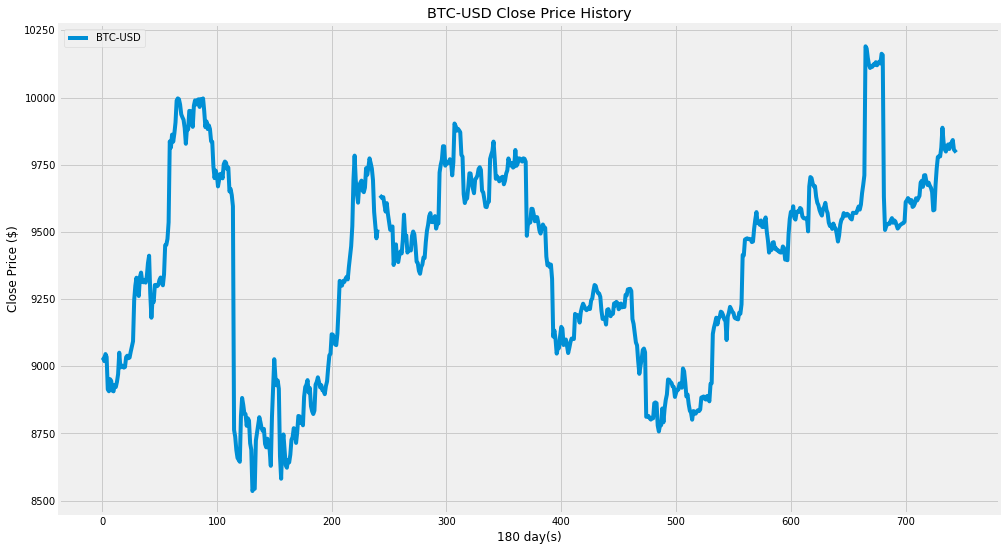

In [26]:
# Plotting the data
plt.figure(figsize=(15, 9))
plt.plot(df['close'], label="BTC-USD")
plt.title("BTC-USD Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc="upper left")
plt.show()

In [27]:
# Create the SMA for 9 days

sma_9 = pd.DataFrame()
sma_9['Close Price'] = df['close'].rolling(window= 9).mean().dropna()

sma_9

,Close Price
8,8986.925781
9,8973.162218
10,8959.387804
11,8949.507161
12,8935.881944
...,...
740,9826.560547
741,9821.483615
742,9818.524306
743,9817.814345


In [28]:
# Create the SMA for 14 days

sma_14 = pd.DataFrame()
sma_14['Close Price'] = df['close'].rolling(window= 14).mean()
sma_14.dropna()

,Close Price
13,8963.833775
14,8959.366071
15,8960.788086
16,8959.132603
17,8956.098633
...,...
740,9809.312360
741,9816.862095
742,9818.843680
743,9820.198312


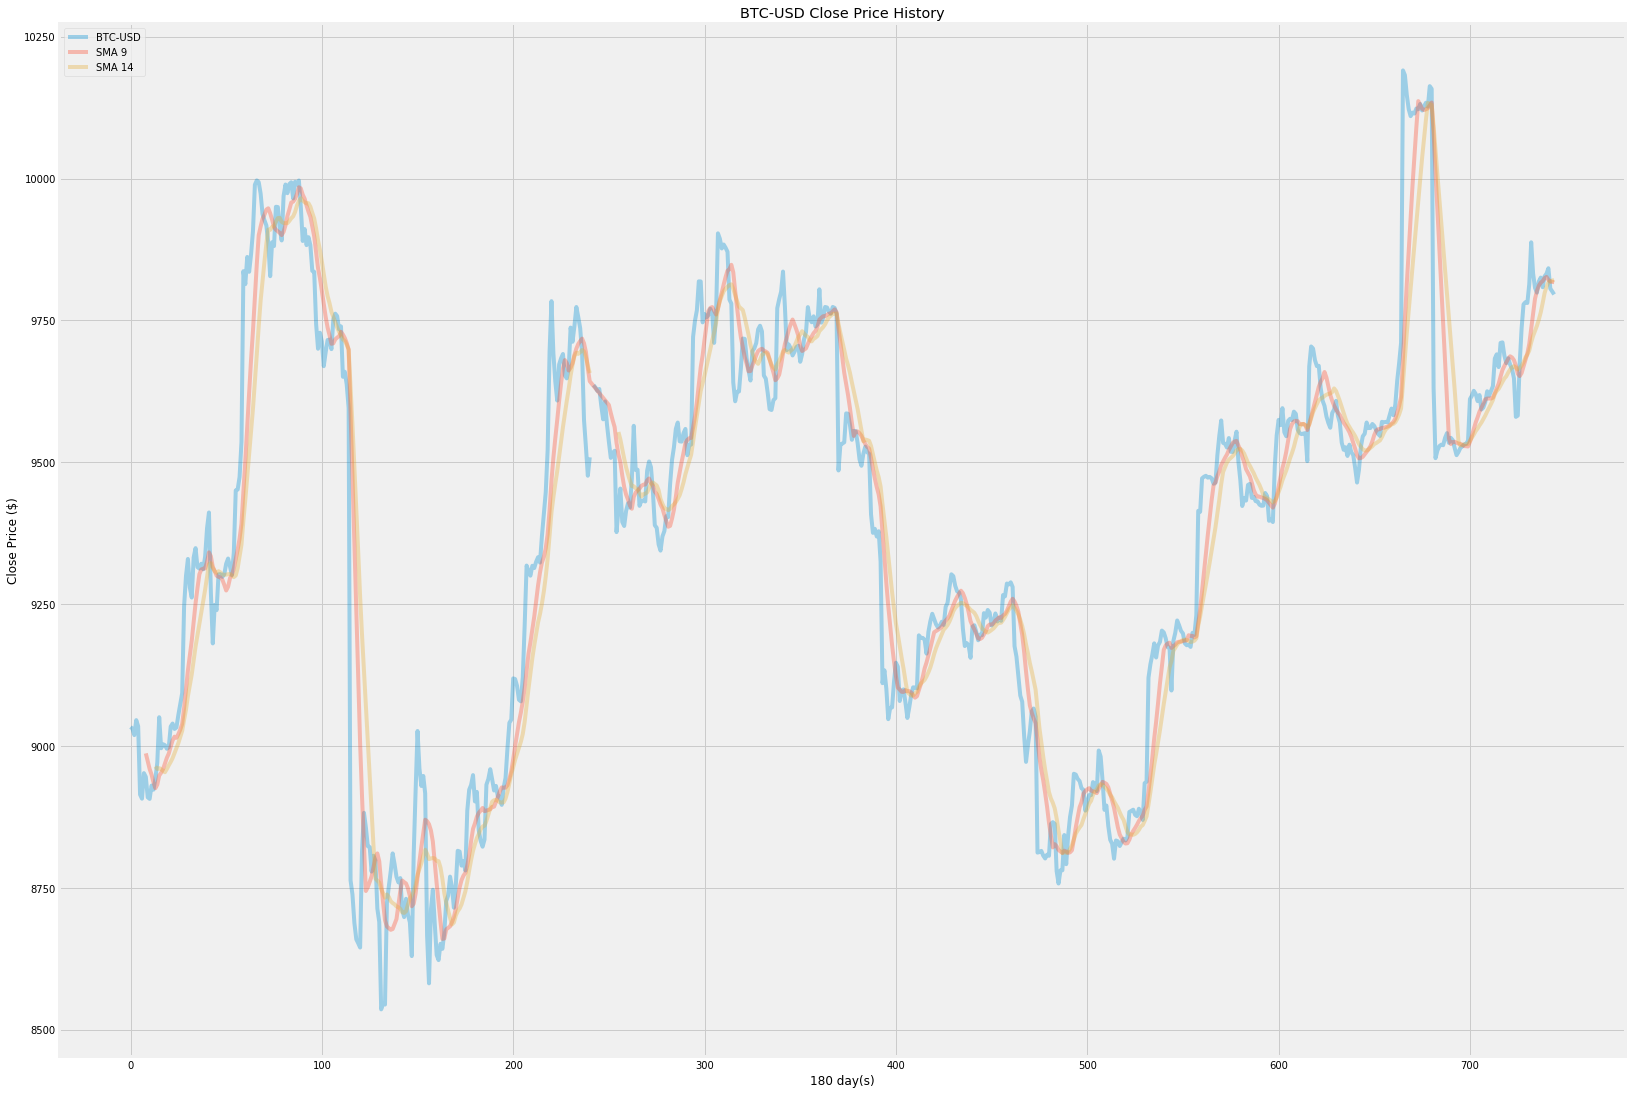

In [29]:
# Plotting the data
plt.figure(figsize=(25, 19))
plt.plot(df['close'], label="BTC-USD",alpha=.35)
plt.plot(sma_9['Close Price'], label="SMA 9", alpha=.35)
plt.plot(sma_14['Close Price'], label="SMA 14",  alpha=.35)
plt.title("BTC-USD Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [30]:
# Merging all the columns into one table
data = pd.DataFrame()
data['BTC-USD'] = df['close']
data['SMA 9'] = sma_9['Close Price']
data['SMA 14'] = sma_14['Close Price']
data.dropna()

,BTC-USD,SMA 9,SMA 14
13,8942.038086,8925.587782,8963.833775
14,8970.801758,8931.868490,8959.366071
15,9050.607422,8947.819878,8960.788086
16,8995.925781,8952.686415,8959.132603
17,9003.070312,8959.082899,8956.098633
...,...,...,...
740,9832.225586,9826.560547,9809.312360
741,9841.917969,9821.483615,9816.862095
742,9806.043945,9818.524306,9818.843680
743,9801.066406,9817.814345,9820.198312


In [31]:
# Creating the signal when to buy and sell the stock

def create_signal(data):
    buy_sig_price = []
    sell_sig_price = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA 9'][i] > data['SMA 14'][i]:
            
            if flag != 1:
                
                buy_sig_price.append(data["BTC-USD"][i])
                sell_sig_price.append(np.nan)
                flag = 1
                
            else:
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        elif data['SMA 9'][i] < data['SMA 14'][i]:
            
            if flag != 0:
                    
                buy_sig_price.append(np.nan)
                sell_sig_price.append(data["BTC-USD"][i])
                flag = 0
                
            else:
                
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        else:
            
            buy_sig_price.append(np.nan)
            sell_sig_price.append(np.nan)
                
    return (buy_sig_price, sell_sig_price)

In [32]:
# Storing values into a variable

buy_sell = create_signal(data)
data["Buy Signal Price"] = buy_sell[0]
data["Sell Signal Price"] = buy_sell[1]

#show data
data.fillna(0)

,BTC-USD,SMA 9,SMA 14,Buy Signal Price,Sell Signal Price
0,9033.349609,0.000000,0.000000,0.0,0.000000
1,9030.699219,0.000000,0.000000,0.0,0.000000
2,9019.102539,0.000000,0.000000,0.0,0.000000
3,9045.545898,0.000000,0.000000,0.0,0.000000
4,9034.685547,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...
740,9832.225586,9826.560547,9809.312360,0.0,0.000000
741,9841.917969,9821.483615,9816.862095,0.0,0.000000
742,9806.043945,9818.524306,9818.843680,0.0,9806.043945
743,9801.066406,9817.814345,9820.198312,0.0,0.000000


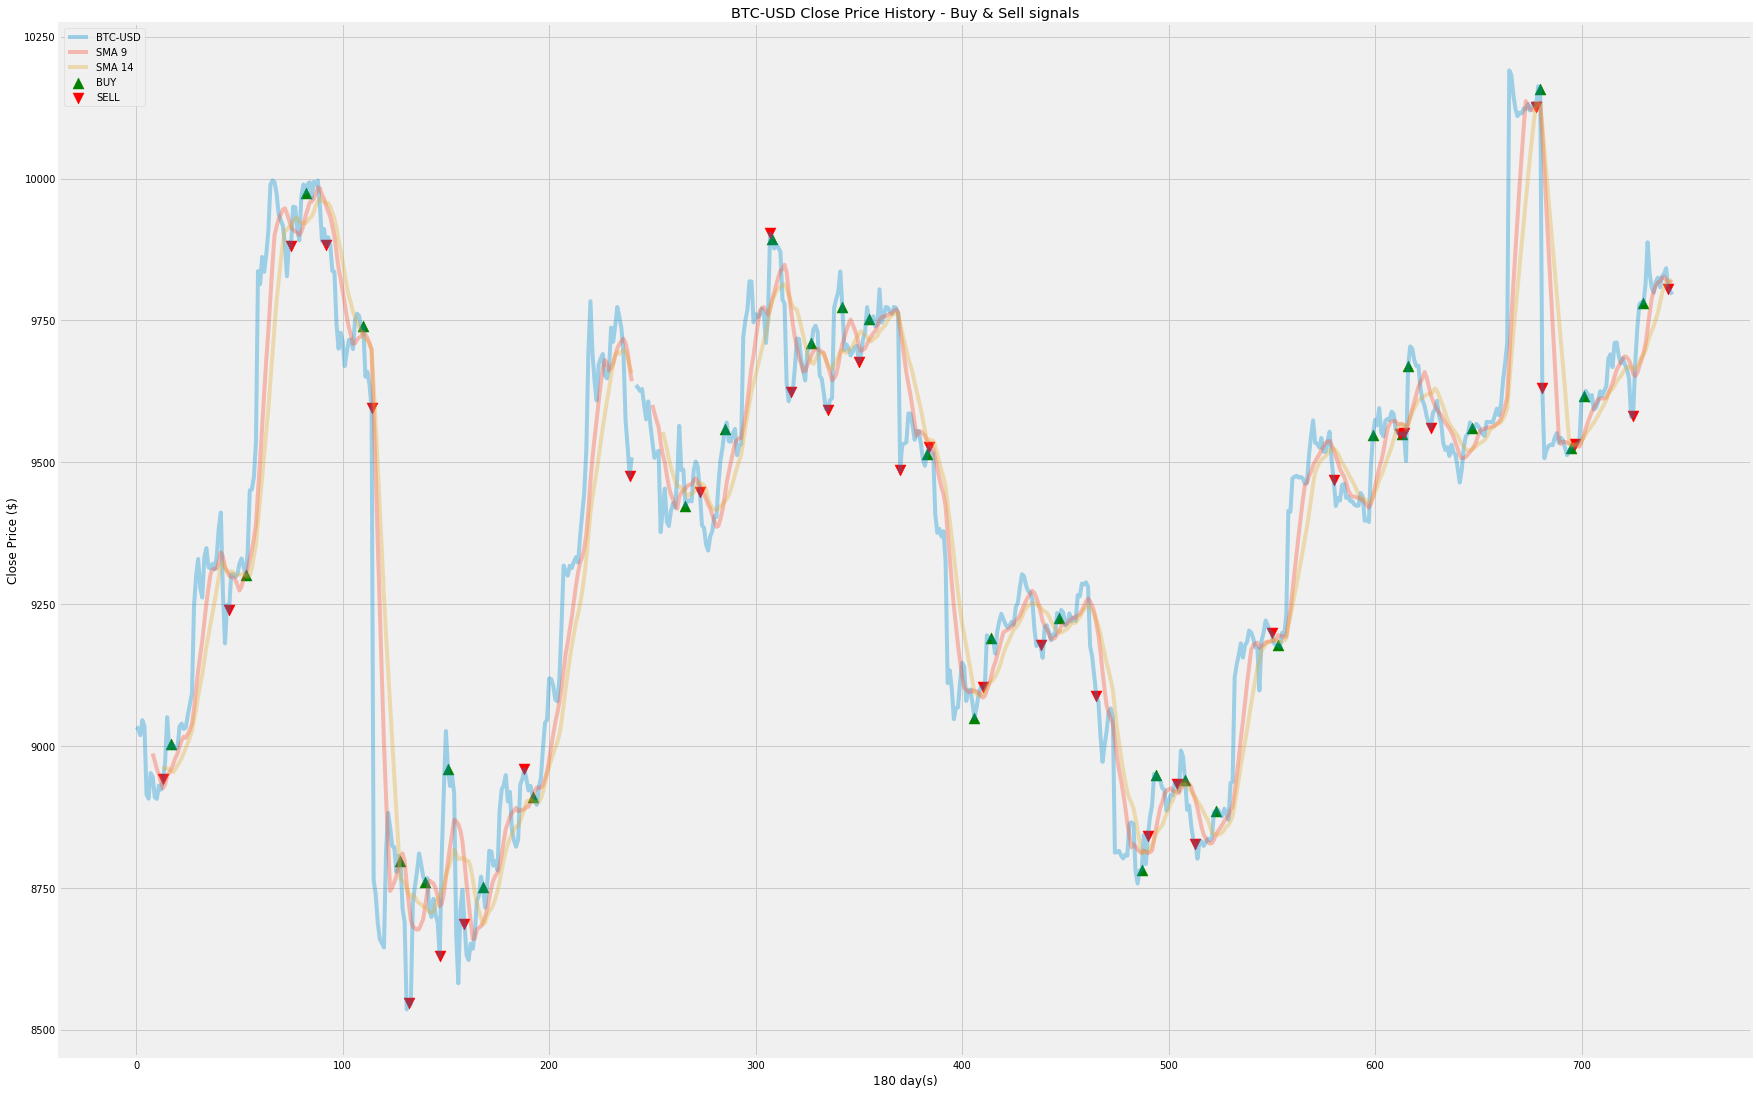

In [33]:
# Plotting the data
plt.figure(figsize=(27, 19))
plt.plot(data['BTC-USD'], label="BTC-USD", alpha=.35)
plt.plot(data['SMA 9'], label="SMA 9", alpha=.35)
plt.plot(data['SMA 14'], label="SMA 14", alpha=.35)
plt.scatter(data.index, data['Buy Signal Price'], label="BUY", marker="^", color='green', s=120)
plt.scatter(data.index, data['Sell Signal Price'], label="SELL", marker="v", color='red', s=120)
plt.title("BTC-USD Close Price History - Buy & Sell signals")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()